In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
d = pd.read_csv('thetadotpdf_10Hz.csv')

In [4]:
d.columns

Index(['bins', 'hist'], dtype='object')

In [36]:
mean, sigma = 0.42, 3.13
n = 13
x = np.linspace(-n+mean, n+mean, 100)
y = 1 / ((2*np.pi)**0.5 * sigma) * np.exp(-1/2 * ((x - mean) / sigma)**2)

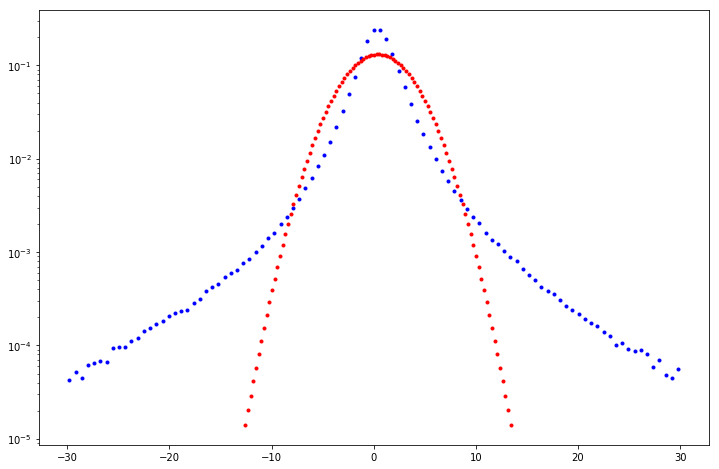

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.semilogy(d.bins, d['hist'], 'b.')
ax.semilogy(x, y, 'r.')

In [9]:
pd.DataFrame({'bins': x, 'hist':y}).to_csv('gaussiancurve.csv', index=False)

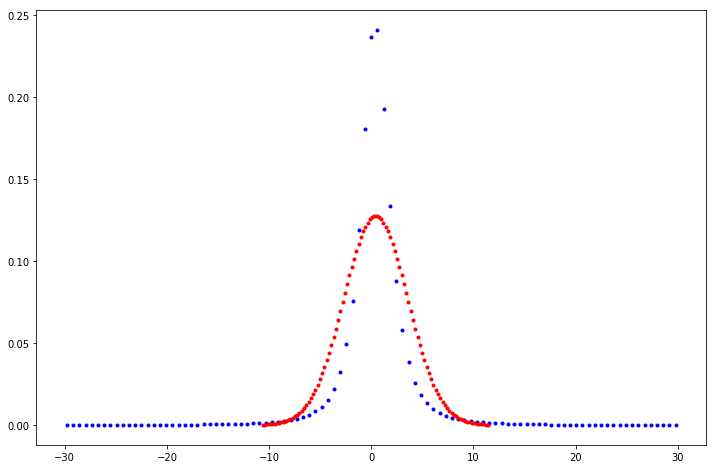

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(d.bins, d['hist'], 'b.')
ax.plot(x, y, 'r.')

In [8]:
dx = x[1]- x[0]
dx

0.22222222222222143

In [9]:
np.sum(y*dx)

0.9996156769515302

In [8]:
np.std(y)

0.044519122700610356

In [20]:
def meanFromPDF(x, y):
    return np.dot(x, y) / np.sum(y)

def moment(x, y, n):
    return np.dot(x**n, y) / np.sum(y)

def centralMoment(x, y, n):
    return moment(x - moment(x, y, 1), y, n)

def kurtosis2(x, y):
    return centralMoment(x, y, 4) / centralMoment(x, y, 2)**2

In [21]:
meanFromPDF(x,y)

0.4199999999999998

In [33]:
centralMoment(x,y,2)**0.5

3.1292138576971014

In [32]:
moment(d.bins, d['hist'], 2)**0.5

3.043606085657798